In [330]:
from mpl_toolkits.mplot3d import Axes3D
#import plotly.graph_objects as go
#Incluímos las librerías que vamos a usar
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import special

In [331]:
delta_D=lambda X,beta: np.exp(-X**2/(4*beta))/np.sqrt(4*np.pi*beta)
#g=lambda nu,Tc,Lc,dT,X,M,i: np.sqrt(4*nu/(np.pi*dT*(1+i)))*np.exp(-X**2/(4*nu*dT*(1+i)))/((2/(np.exp(M/(2*nu))-1))+(np.sqrt(np.pi)/2)*(1-special.erf(X/np.sqrt(4*nu*dT*(1+i)))))
G=lambda nu,T,X,M: np.sqrt(4*nu/(np.pi*T))*np.exp(-X**2/(4*nu*T))/((2/(np.exp(M/(2*nu))-1))+(np.sqrt(np.pi)/2)*(1-special.erf(X/np.sqrt(4*nu*T))))
B= lambda v,dT,dX: v*dT/(2*dX**2)
Eta=lambda T,X: T/X**2
Alpha=lambda dT,dX:dT/(4*dX)

def matriz(incog, up, alfa, eta, beta):
    A=np.zeros((incog,incog))
    rows,cols=A.shape
    for j in range(rows):
        for i in range(cols):
            if j==i:
                A[j,i]=1+2*eta*beta
                if j>0:
                    A[j,i-1]=-(eta*beta+alfa*up[j+1])
                if j<rows-1:
                    A[j,i+1]=-(eta*beta-alfa*up[j+1])
    invA=np.linalg.inv(A)
    return invA, A


def vectorB(incog,up,eta,beta,alfa):
    b=np.zeros(incog)
    b[0]=2*(eta*beta+alfa*up[1])*up[0]+(1-2*eta*beta)*up[1]+(eta*beta-alfa*up[1])*up[2]
    b[1:-1]=(eta*beta+alfa*up[2:-2])*up[1:-3]+(1-2*eta*beta)*up[2:-2]+(eta*beta-alfa*up[2:-2])*up[3:-1]
    b[-1]=(eta*beta+alfa*up[-2])*up[-3]+(1-2*eta*beta)*up[-2]+2*(eta*beta-alfa*up[-2])*up[-1]
    return b





In [332]:
M=1;beta=0.005;nu1=0.02;nu2=0.04;nu3=0.1;bc=2 #parametros bc(boundary conditions/ condiciones de frontera)
Nu=[nu1,nu2,nu3]

# Implementación

La primera línea de código es donde se cambia el parametro de viscosidad cinemática ($\nu$), se encuentra almacenado como vector, entonces solo cambiar el índice del elemento.
* Para 0.02 es 0
* Para 0.04 es 1
* Para 0.1 es 2

In [337]:
nu=Nu[0] #Variar nu

x0=0;xf=1;dx=0.01
x=np.arange(x0,xf+dx,dx)
t0=0.1;tf=1;dt=0.002
t=np.arange(t0,tf+dt,dt)

up=np.zeros(len(x))
uf=np.zeros(len(x))
#up=delta_D(x,beta)
up=G(nu,0.1,x,M)

n1=Eta(tf,xf)
alpha1=Alpha(dt,dx)
Beta1=B(nu,dt,dx)
print("Número de Fourier =",nu*dt/dx**2)
nodos=len(x)-bc
U=np.zeros((len(x),len(t)))
U_ana=np.zeros((len(x),len(t)))


# plt.figure(2, figsize=(8,6))
# plt.plot(x, up,':b',label='Solución Analítica')
# plt.plot(x,delta_D(x,beta),'--r',label='Delta de Dirac')
# plt.title('Condición Inicial')
# plt.xlabel(r'x[m]')
# plt.ylabel(r'Velocidad [m/s]')
# plt.legend()
# plt.grid()
# plt.show()

Número de Fourier = 0.4


## Resolución

In [334]:
error=np.zeros((len(x),len(t)))
for time in range(0,len(t)):
  invA,A=matriz(nodos,up,alpha1,n1,Beta1)
  b=vectorB(nodos,up,n1,Beta1,alpha1)
  uf[1:-1]=np.dot(invA,b)
  uf[0]=G(nu,t[time],x[0],M)
  uf[-1]=G(nu,t[time],x[-1],M)
  up=uf
  for i in range(len(up)):
    U[i][time]=up[i]
    error[i][time]=up[i]-G(nu,t[time],x[i],M)



for time in range(len(t)):
  for i in range(len(up)):
    U_ana[i][time]=G(nu,t[time],x[i],M)



## Cálculo errores

In [335]:
sum=0
SUM=0
a,b=error.shape
for j in range(a):
  for i in range(b):
     sum=(error[j][i])**2+sum
  sum=sum/b
  SUM+=np.sqrt(sum)
  sum=0
print(SUM/a)

#0.1,0.1,0.585769249370591
#0.05,0.01,0.28927695570772893
#0.02,0.01,0.22699647934880404
#0.01,0.002,0.0968671135694262
#0.005,0.0006,0.12806142165263987
#0.004,0.0003,0.13624583688252495



0.0968671135694262


##Gráficas


###Solución

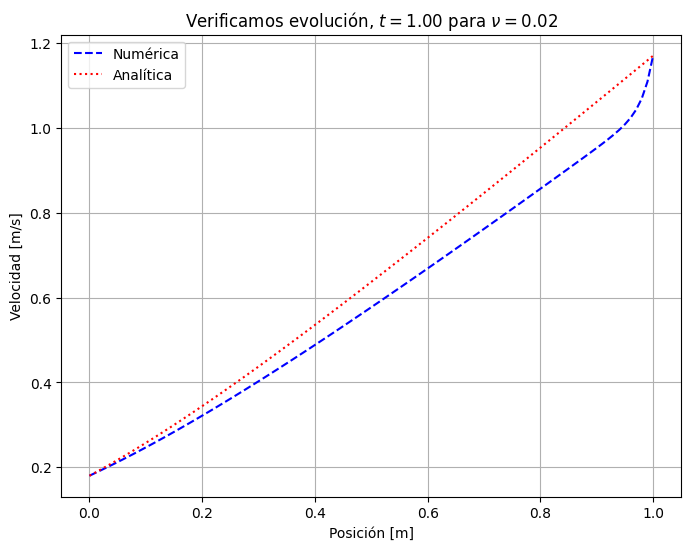

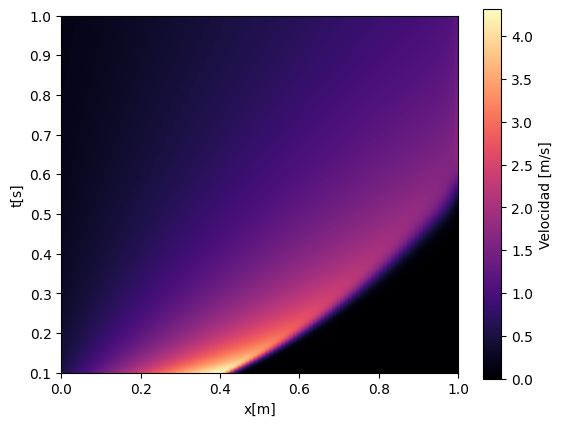

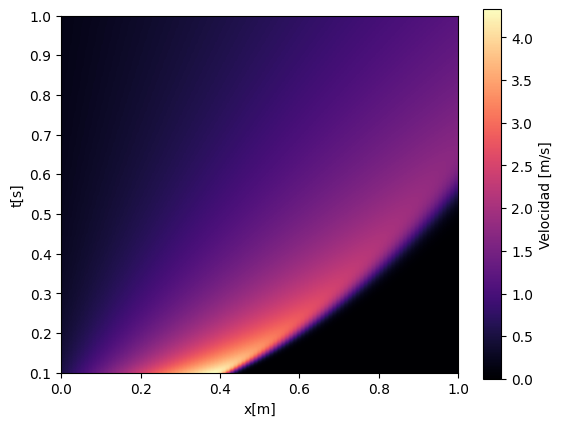

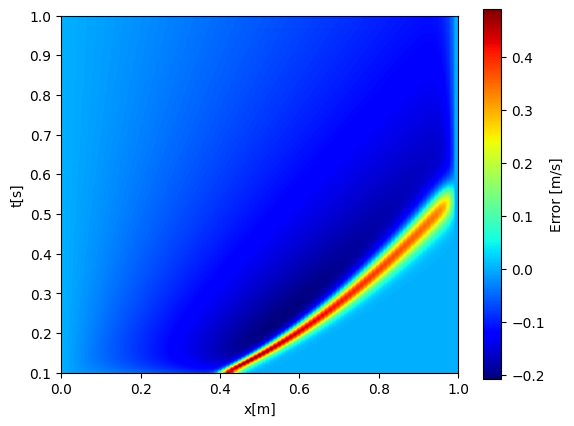

In [336]:
plt.figure(2, figsize=(8,6))
plt.plot(x, up, "--b",label="Numérica")
plt.plot(x, G(nu,t[-1],x,M), ":r",label="Analítica")
plt.title(r'Verificamos evolución, $t={:.2f}$ para $\nu={}$' .format(t[-1],nu))
plt.xlabel("Posición [m]")
plt.ylabel("Velocidad [m/s]")
plt.legend()
plt.grid()
plt.show()
X,T=np.meshgrid(x,t)
Ta,Xa=np.meshgrid(t,x)


#ax1 = plt.axes(projection='3d')
#ax1.plot_surface(Xa, Ta, U, rstride=1, cstride=1,cmap='magma', edgecolor='none')
#ax1.set_xlabel('x[m]')
#ax1.set_ylabel('t[s]')
#ax1.set_zlabel('Velocidad[m/s]')
#ax1.set_title('Simulación en t=%.2f, para 'r'$\nu=0.02$' % t[-1])
#plt.show()



U1=np.rot90(U)
fig1 = plt.figure()
ax11=plt.axes()
cp1=ax11.imshow(U1,cmap='magma',extent=[0,xf,t0,tf])
fig1.colorbar(cp1,label='Velocidad [m/s]')
ax11.set_xlabel('x[m]')
ax11.set_ylabel('t[s]')
plt.show()

U_ana1=np.rot90(U_ana)
fig12 = plt.figure()
ax112=plt.axes()
cp12=ax112.imshow(U_ana1,cmap='magma',extent=[0,xf,t0,tf])
fig12.colorbar(cp12,label='Velocidad [m/s]')
ax112.set_xlabel('x[m]')
ax112.set_ylabel('t[s]')
plt.show()

error1=np.rot90(error)
fig12 = plt.figure()
ax112=plt.axes()
cp12=ax112.imshow(error1,cmap='jet',extent=[0,xf,t0,tf])
fig12.colorbar(cp12,label='Error [m/s]')
ax112.set_xlabel('x[m]')
ax112.set_ylabel('t[s]')
plt.show()



###Errores

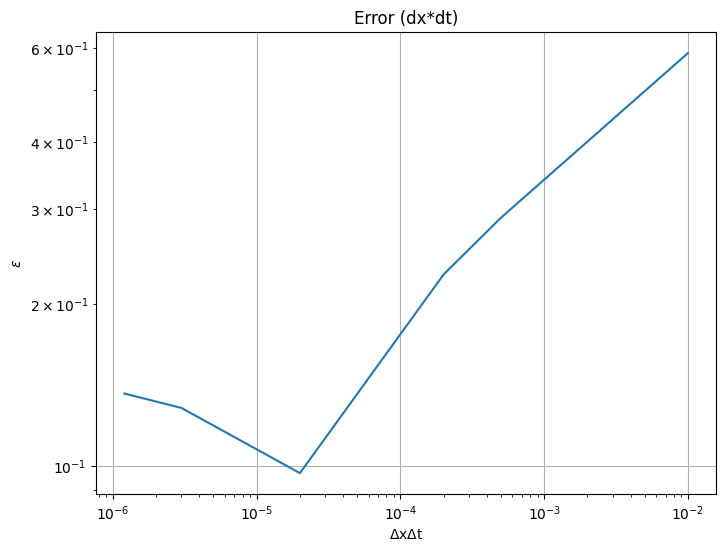

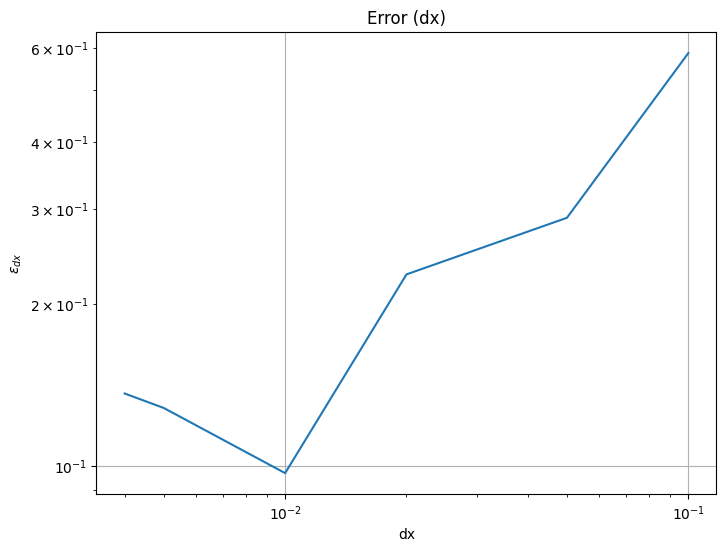

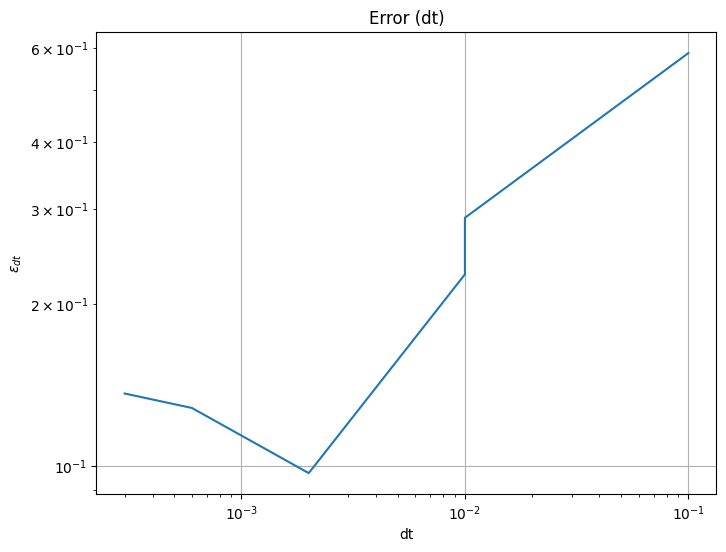

In [290]:
#Graficar log(error)
x_e=[0.1*0.1,0.05*0.01,0.02*0.01,0.01*0.002,0.005*0.0006,0.004*0.0003]
dx_e=[0.1,0.05,0.02,0.01,0.005,0.004]
dt_e=[0.1,0.01,0.01,0.002,0.0006,0.0003]
y_e=[0.585769249370591,0.28927695570772893,0.22699647934880404,0.0968671135694262,0.12806142165263987,0.13624583688252495]

#ax = axs['log-log']
#ax.loglog(x_e, y_e)
#ax.set_xlabel('dx*dt')
#ax.set_ylabel(r'$\epsilon$')
#ax.set_title('Error')

plt.figure(2, figsize=(8,6))
plt.loglog(x_e, y_e)
plt.title('Error (dx*dt)')
plt.xlabel(r'$\Delta$x$\Delta$t')
plt.ylabel(r'$\epsilon$')
plt.grid()
plt.show()

plt.figure(2, figsize=(8,6))
plt.loglog(dx_e, y_e)
plt.title('Error (dx)')
plt.xlabel('dx')
plt.ylabel(r'$\epsilon_{dx}$')
plt.grid()
plt.show()

plt.figure(2, figsize=(8,6))
plt.loglog(dt_e, y_e)
plt.title('Error (dt)')
plt.xlabel("dt")
plt.ylabel(r'$\epsilon_{dt}$')
plt.grid()
plt.show()